In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False 

--2021-12-07 04:22:07--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  24.5MB/s    in 0.4s    

2021-12-07 04:22:07 (24.5 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from random import sample
import matplotlib.colors as pltc
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
plt.rcParams['figure.figsize']=(15,8)
from sklearn import tree #導入決策樹模組

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
df=pd.read_excel('loan(new).xlsx')

In [ ]:
df.head()

,編號,貸款狀態,產業別,企業型態,成立時間,擔保品,銀行往來關係,最近三年增資情形,負責人年齡,負責人學歷,是否動用信用卡循環額度,流動比率1,流動比率2,流動比率3,速動比率1,速動比率2,速動比率3,負債比率1,負債比率2,負債比率3,固定長期適合率1,固定長期適合率2,固定長期適合率3,應收款項週轉率1,應收款項週轉率2,應收款項週轉率3,存貨週轉率1,存貨週轉率2,存貨週轉率3
0,1,normal household,manufacturing,family,more than 10 years,Partial deposit guarantee,main bank,no,45-60 years old,college graduation,no,59.1,55.1,17.1,45.4,45.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,8.7,4.3,7.7,6.7,11.6,18.1
1,2,normal household,non-manufacturing,family,1-5years,Credit guarantee agency,non-main bank,yes,60 years old or older,high school,no,361.6,52.7,119.0,335.6,46.7,99.7,17.5,NaN,387.3,53.8,NaN,0.7,3.6,7.1,2.6,3.1,38.2,24.0
2,3,normal household,manufacturing,family,5-10years,Credit guarantee agency,main bank,no,45-60 years old,under junior high school,yes,15308.3,801.7,372.3,1300.0,34.0,12.9,0.2,47.8,30.7,0.2,47.8,30.7,1.9,4.5,NaN,4.2,0.1,0.0
3,4,normal household,non-manufacturing,family,more than 10 years,movable property or real estate,main bank,no,45-60 years old,under junior high school,no,19.0,4.6,6.1,17.2,3.1,5.6,3089.8,NaN,NaN,2567.4,NaN,NaN,25.7,22.4,34.4,104.4,112.3,NaN
4,5,normal household,manufacturing,family,5-10years,movable property or real estate,main bank,yes,30-45 years old,high school,no,123.4,101.7,142.4,2.4,41.7,28.8,398.4,5714.7,235.5,1.8,5.0,0.1,NaN,19.9,10.6,2.8,3.5,2.2


In [ ]:
df=df.dropna()
df['貸款狀態'] = df['貸款狀態'].apply(lambda x:0 if x == "Default account" else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in ["產業別","企業型態",	"成立時間",	"擔保品",	"銀行往來關係",	"最近三年增資情形",	"負責人年齡",	"負責人學歷",	"是否動用信用卡循環額度"]:
  df[i] = labelencoder.fit_transform(df[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#變異數分析

In [ ]:
one=df.drop(["編號","貸款狀態","產業別","企業型態",	"成立時間",	"擔保品",	"銀行往來關係",	"最近三年增資情形",	"負責人年齡",	"負責人學歷",	"是否動用信用卡循環額度"],axis=1).columns
name2=[]
alist2=[]
pvlist2=[]
for i in range(len(one)):
  (a2,pv2)=stats.f_oneway(df[one[i]][df['貸款狀態']==0],
                          df[one[i]][df['貸款狀態']==1])
  name2.append(one[i])
  alist2.append(a2)
  pvlist2.append(pv2)
result2=pd.DataFrame(alist2,name2,columns=['F_value'])
result2.insert(1,'p-value',pvlist2)
result2['是否顯著影響'] = result2["p-value"].apply(lambda x:"顯著影響" if x<=0.05 else "無顯著影響")
result2

,F_value,p-value,是否顯著影響
流動比率1,0.049649,0.824085,無顯著影響
流動比率2,0.712800,0.400332,無顯著影響
流動比率3,0.628486,0.429602,無顯著影響
速動比率1,0.020621,0.886076,無顯著影響
速動比率2,0.583452,0.446583,無顯著影響
速動比率3,0.938440,0.334786,無顯著影響
負債比率1,0.413997,0.521275,無顯著影響
負債比率2,0.046505,0.829656,無顯著影響
負債比率3,0.209779,0.647836,無顯著影響
固定長期適合率1,3.071863,0.082419,無顯著影響


In [ ]:
qv3=["產業別","企業型態",	"成立時間",	"擔保品",	"銀行往來關係",	"最近三年增資情形",	"負責人年齡",	"負責人學歷",	"是否動用信用卡循環額度"]
chi = []
p = []
name = []
for i in qv3:
  hh=pd.crosstab(df['貸款狀態'],df[i])
  cr=stats.chi2_contingency(hh)
  p.append(cr[1])
  chi.append(cr[0])
  name.append(i)
name = pd.DataFrame(name)
name['chi'] = chi
name['p'] = p
name['是否顯著影響'] = name["p"].apply(lambda x:"顯著影響" if x<=0.05 else "無顯著影響")
name

,0,chi,p,是否顯著影響
0,產業別,0.000000,1.000000e+00,無顯著影響
1,企業型態,0.203085,6.522422e-01,無顯著影響
2,成立時間,10.360594,5.626336e-03,顯著影響
3,擔保品,18.719020,3.125170e-04,顯著影響
4,銀行往來關係,0.407657,5.231609e-01,無顯著影響
5,最近三年增資情形,0.856938,3.545970e-01,無顯著影響
6,負責人年齡,12.451428,5.986406e-03,顯著影響
7,負責人學歷,0.581544,9.006442e-01,無顯著影響
8,是否動用信用卡循環額度,29.690859,5.067320e-08,顯著影響


In [ ]:
y = df["貸款狀態"]
X = df[["成立時間","擔保品","負責人年齡","是否動用信用卡循環額度",]]

In [ ]:
# log_reg = sm.Logit(y, X).fit() 
# print(log_reg.summary())

In [ ]:
from sklearn.model_selection import train_test_split #區分訓練集與測試集
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

#決策樹分析

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(max_depth=5)
DT= DT.fit(X, y)

In [ ]:
DT_pred= DT.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,DT_pred))
print("======================================================\n")
print(classification_report(y_train,DT_pred))

[[13  3]
 [ 3 71]]

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.96      0.96      0.96        74

    accuracy                           0.93        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.93      0.93      0.93        90



In [ ]:
DT_pred= DT.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,DT_pred))
print("======================================================\n")
print(classification_report(y_test,DT_pred))

[[ 2  2]
 [ 1 18]]

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.90      0.95      0.92        19

    accuracy                           0.87        23
   macro avg       0.78      0.72      0.75        23
weighted avg       0.86      0.87      0.86        23



In [ ]:
import graphviz 
dot_data = tree.export_graphviz(DT,feature_names=["成立時間","擔保品","負責人年齡","是否動用信用卡循環額度"],    
                      filled=True, rounded=True,fontname=zhfont)  
graph = graphviz.Source(dot_data,format="png")  
graph 
graph.render("決策樹")

'決策樹.png'

#SVM

In [ ]:
from sklearn import svm 
clf = svm.SVC(kernel = 'linear') 
clf.fit(X_train,y_train) 

SVC(kernel='linear')

In [ ]:
#列印訓練完成之模式的混淆矩陣(confusion matrix)以及模式衡量指標
from sklearn.metrics import classification_report,confusion_matrix
clf_tpred= clf.predict(X_train)
print(confusion_matrix(y_train,clf_tpred))
print("======================================================\n")
print(classification_report(y_train,clf_tpred))

[[ 7  9]
 [ 2 72]]

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.89      0.97      0.93        74

    accuracy                           0.88        90
   macro avg       0.83      0.71      0.74        90
weighted avg       0.87      0.88      0.86        90



In [ ]:
clf_pred= clf.predict(X_test)
print(confusion_matrix(y_test,clf_pred))
print("======================================================\n")
print(classification_report(y_test,clf_pred))

[[ 2  2]
 [ 0 19]]

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.90      1.00      0.95        19

    accuracy                           0.91        23
   macro avg       0.95      0.75      0.81        23
weighted avg       0.92      0.91      0.90        23



#羅吉斯回歸

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

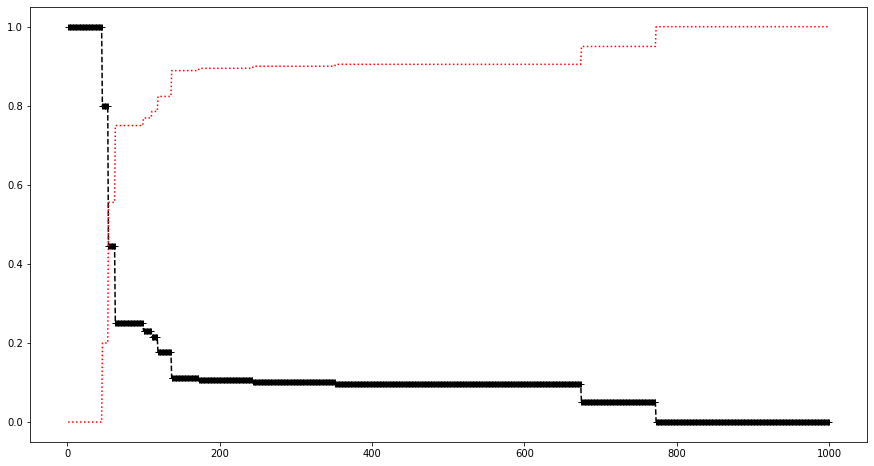

In [ ]:
pre_test_prob=pd.DataFrame(LR.predict_proba(X_test))
from sklearn.metrics import confusion_matrix
tp_list = []
fn_list = []
for i in range(1000):
  pre_test=pre_test_prob[0].apply(lambda x: 0 if x*1000>i else 1)
  tp = confusion_matrix(pre_test,y_test)[0,0]
  fn = confusion_matrix(pre_test,y_test)[1,1]
  tp_precision = tp/(tp+fn)
  fn_precision = fn/(tp+fn)
  # print(tp_precision,fn_precision)
  if -0.01< tp_precision-fn_precision <0.01:
    print(i/1000)
  else:
    pass
  tp_list.append(tp_precision)
  fn_list.append(fn_precision)
plt.plot([i for i in range(1,1001)], tp_list, 'k--+')   
plt.plot([i for i in range(1,1001)], fn_list, 'r:')


In [ ]:
p = 0.045
pre_t=pre_test_prob[0].apply(lambda x: 0 if x>p else 1)

In [ ]:
#計算正確率、精準度、召回率及綜合指標f1(train訓練集)
from sklearn.metrics import classification_report,confusion_matrix
print(metrics.classification_report(y_test,pre_t))

              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.05      0.10        19

    accuracy                           0.22        23
   macro avg       0.59      0.53      0.20        23
weighted avg       0.86      0.22      0.14        23



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(metrics.classification_report(y_train,LR.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.87      0.97      0.92        74

    accuracy                           0.86        90
   macro avg       0.79      0.64      0.68        90
weighted avg       0.84      0.86      0.83        90



In [ ]:
print(classification_report(y_test,LR.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.90      1.00      0.95        19

    accuracy                           0.91        23
   macro avg       0.95      0.75      0.81        23
weighted avg       0.92      0.91      0.90        23

